In [13]:
# Dependencies
from citipy import citipy
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from scipy.stats import linregress

from config import owm_key

In [2]:
# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

# build partial query URL
query_url = f"{base_url}appid={owm_key}&units={units}&q="

In [3]:
# collect data from Open Weather 

# build list of cities to include
cities = ["Algiers", 
          "Antananarivo", "Atjens", "Bamako", "Basseterre",
          "Beijing", "Brasilia", "Brussels", "Cairo", "Canberra", "Cape Town",
          "Gaborone", "Helsinki", "Jakarta", "Kingston",
          "London", "Male", "Manila", "Oslo", "Paris", "Rabat", "Reykjavik",
          "Santiago", "Seoul", "Stockholm", "Tokyo", "Vienna", "Warsaw", "Wellington"
         ]

# set up lists to hold reponse info
valid_cities_n = []
valid_cities_s = []
lat_n = []
lat_s = []
temp_n = []
temp_s = []
humidity_n = []
humidity_s = []
wind_n = []
wind_s = []
clouds_n = []
clouds_s = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        if response['coord']['lat'] >= 0:
            valid_cities_n.append(city)
            lat_n.append(response['coord']['lat'])
            temp_n.append(response['main']['temp'])
            humidity_n.append(response['main']['humidity'])
            wind_n.append(response['wind']['speed'])
            clouds_n.append(response['clouds']['all'])
        else:
            valid_cities_s.append(city)
            lat_s.append(response['coord']['lat'])
            temp_s.append(response['main']['temp'])
            humidity_s.append(response['main']['humidity'])
            wind_s.append(response['wind']['speed'])
            clouds_s.append(response['clouds']['all'])

valid_cities = valid_cities_n + valid_cities_s
lat = lat_n + lat_s
temp = temp_n + temp_s
humidity = humidity_n + humidity_s
wind = wind_n + wind_s
clouds = clouds_n + clouds_s

# build dataframe from results
weather_results_df = pd.DataFrame(
    {"City": valid_cities,
     "Latitude": lat,
     "Temperature": temp,
     "Humidity": humidity,
     "Wind": wind,
     "Clouds": clouds,
     })

print (lat_n)
print (lat_s)
print (lat)

[36.75, 12.65, 17.29, 39.91, 50.85, 30.06, 60.17, 18, 51.51, 4.17, 14.6, 59.91, 48.85, 33.99, 64.14, 37.57, 59.33, 35.69, 48.21, 52.23]
[-18.91, -15.78, -35.28, -33.93, -24.65, -6.21, -33.46, -41.29]
[36.75, 12.65, 17.29, 39.91, 50.85, 30.06, 60.17, 18, 51.51, 4.17, 14.6, 59.91, 48.85, 33.99, 64.14, 37.57, 59.33, 35.69, 48.21, 52.23, -18.91, -15.78, -35.28, -33.93, -24.65, -6.21, -33.46, -41.29]


In [4]:
# Create scatter plots to show the following relationships from data gathered from Open Weather 
# 1. Temperature (F) vs. Latitude
# 2. Humidity (%) vs. Latitude
# 3. Cloudiness (%) vs. Latitude
# 4. Wind Speed (mph) vs. Latitude

In [52]:
def print_scatterchart(x_axis, y_axis, title, x_label, y_label):

    fig = plt.figure()
    plt.scatter(x_axis, y_axis, marker="o", facecolors="darkblue")
    fig.suptitle(title, fontsize=12)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

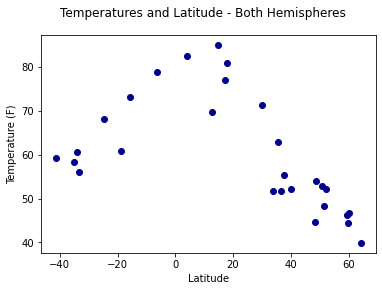

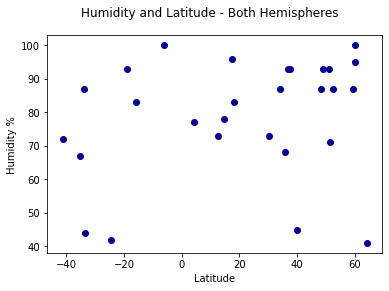

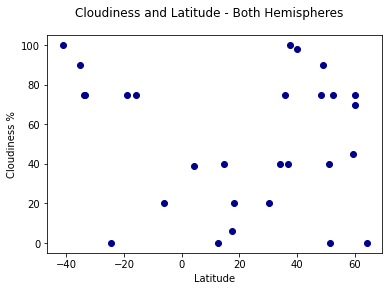

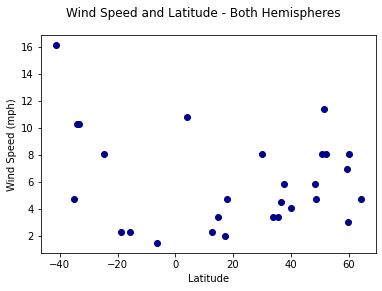

In [58]:
# print scatter charts

# Temperature vs. Latitude
print_scatterchart(lat, temp, "Temperatures and Latitude - Both Hemispheres", "Latitude", "Temperature (F)")
print("")

# Humidity vs. Latitude
print_scatterchart(lat, humidity, "Humidity and Latitude - Both Hemispheres", "Latitude", "Humidity %")
print("")

# Cloudiness vs. Latitude
print_scatterchart(lat, clouds, "Cloudiness and Latitude - Both Hemispheres", "Latitude", "Cloudiness %")
print("")

# Wind speed vs. Latitude
print_scatterchart(lat, wind, "Wind Speed and Latitude - Both Hemispheres", "Latitude", "Wind Speed (mph)")



In [ ]:
# Run linear regression on each relationship, only this time separating them into
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and
# Southern Hemisphere (less than 0 degrees latitude)

In [62]:
def print_scatter_and(x_axis, y_axis, title, x_label, y_label):
# print scatter charter and regression analsysi

    # make x_axis amenable to calculation of regression values
    x_axis = np.asarray(x_axis)
    
    # run linregress to get components for correlaton coefficient and regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,  y_axis)
    regress_values = x_axis * slope + intercept

    # calc correlation coefficient and format regression model equation
    correlation_coefficient = round(rvalue**2, 2)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # figure out where to place the regression model equation
    test_val = (slope*max(x_axis) + intercept) - (slope*min(x_axis) + intercept)
    x_pos = min(x_axis)
    if test_val > 0:
        if max(y_axis) > 25:
            y_pos = max(y_axis) - 5
        else:
            y_pos = max(y_axis) - 1
    else:
        if max(y_axis) > 25:
            y_pos = min(y_axis) + 5
        else:
            y_pos = min(y_axis) + 1

    # format and print plot
    fig = plt.figure()
    plt.scatter(x_axis, y_axis, marker="o", facecolors="darkblue")
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(x_pos,y_pos),fontsize=15,color="red")
    fig.suptitle(title, fontsize=12)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    print(f'Correlation coefficient = {correlation_coefficient}')
    print('')


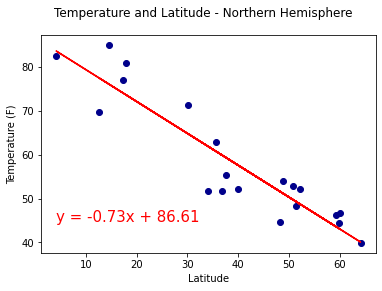

Correlation coefficient = 0.85




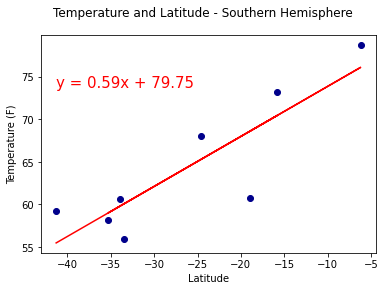

Correlation coefficient = 0.75




In [77]:
# Calculate the correlation coefficient and linear regression model 
# Temperature (F) vs. Latitude by hemisphere

measure = "Temperature"

# Northern Hemisphere
title = f"{measure} and Latitude - Northern Hemisphere"
print_scatter_and(lat_n, temp_n, title, "Latitude", f"{measure} (F)")
print("")

# Southern Hemisphere
title = f"{measure} and Latitude - Southern Hemisphere"
print_scatter_and(lat_s, temp_s, title, "Latitude", f"{measure} (F)")
print("")


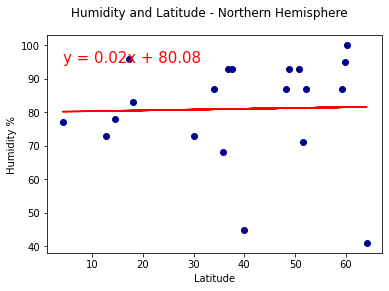

Correlation coefficient = 0.0




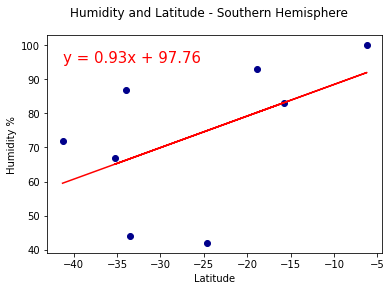

Correlation coefficient = 0.26




In [75]:
# Calculate the correlation coefficient and linear regression model 
# Humidity (%) vs. Latitude

measure = "Humidity"

# Northern Hemisphere
title = f"{measure} and Latitude - Northern Hemisphere"
print_scatter_and(lat_n, humidity_n, title, "Latitude", f"{measure} %")
print("")

# Southern Hemisphere
title = f"{measure} and Latitude - Southern Hemisphere"
print_scatter_and(lat_s, humidity_s, title, "Latitude", f"{measure} %")
print("")


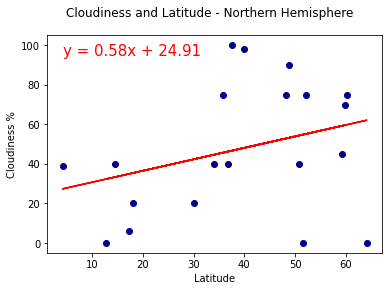

Correlation coefficient = 0.1




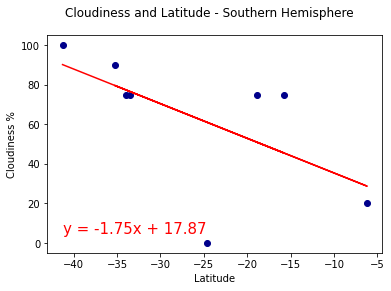

Correlation coefficient = 0.36




In [74]:
# Calculate the correlation coefficient and linear regression model 
# Cloudiness (%) vs. Latitude

measure = "Cloudiness"

# Northern Hemisphere
title = f"{measure} and Latitude - Northern Hemisphere"
print_scatter_and(lat_n, clouds_n, title, "Latitude", f"{measure} %")
print("")

# Southern Hemisphere
title = f"{measure} and Latitude - Southern Hemisphere"
print_scatter_and(lat_s, clouds_s, title, "Latitude", f"{measure} %")
print("")


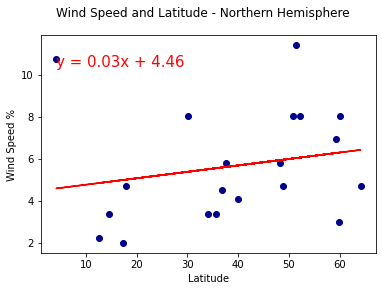

Correlation coefficient = 0.04




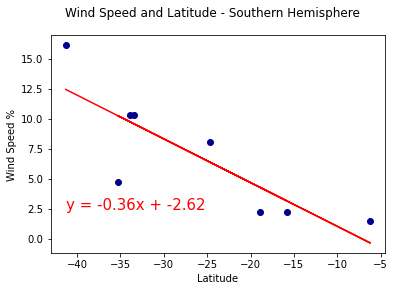

Correlation coefficient = 0.7




In [71]:
# Calculate the correlation coefficient and linear regression model 
# Wind Speed (mph) vs. Latitude

measure = "Wind Speed"

# Northern Hemisphere
title = f"{measure} and Latitude - Northern Hemisphere"
print_scatter_and(lat_n, wind_n, title, "Latitude", f"{measure} %")
print("")

# Southern Hemisphere
title = f"{measure} and Latitude - Southern Hemisphere"
print_scatter_and(lat_s, wind_s, title, "Latitude", f"{measure} %")
print("")
